In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from math import sqrt
# latexify(fig_width = 10)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', **{'family': 'sans-serif',
              'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_style("ticks")

In [2]:
xls = pd.ExcelFile("/kaggle/input/final-plots/Experiment - 1.xlsx")

In [3]:
df1 = pd.read_excel(xls, sheet_name="VGG", index_col=0)
df2 = pd.read_excel(xls, sheet_name="ResNet", index_col = 0)

# VGG Plotting

In [4]:
df1 = df1.rename(columns = {"Unnamed: 1":"% Pruned", "Accuracy of CIFAR10-B":"CIFAR-10A", "Unnamed: 3":"Random", "Unnamed: 4":"CIFAR10-B"})

In [5]:
df1 = df1.iloc[1:]

In [6]:
df1.dropna(inplace = True)

In [7]:
x = np.float64(df1["% Pruned"].values)
cifar_a = np.float64(df1["Accuracy on CIFAR10-B"].values)
cifar_b = np.float64(df1["CIFAR10-B"].values)
rd = np.float64(df1["Random"].values)

In [8]:
idx_vals = [0,20,36,48.8,59.04,67.23,73.79,86.58,93.13,96.48,98.2,99.08,99.53,99.81,99.88]
idx = []
for i in range(len(x)):
    for j in range(len(idx_vals)):
        if x[i] == idx_vals[j]:
            idx.append(i)
idx.sort()

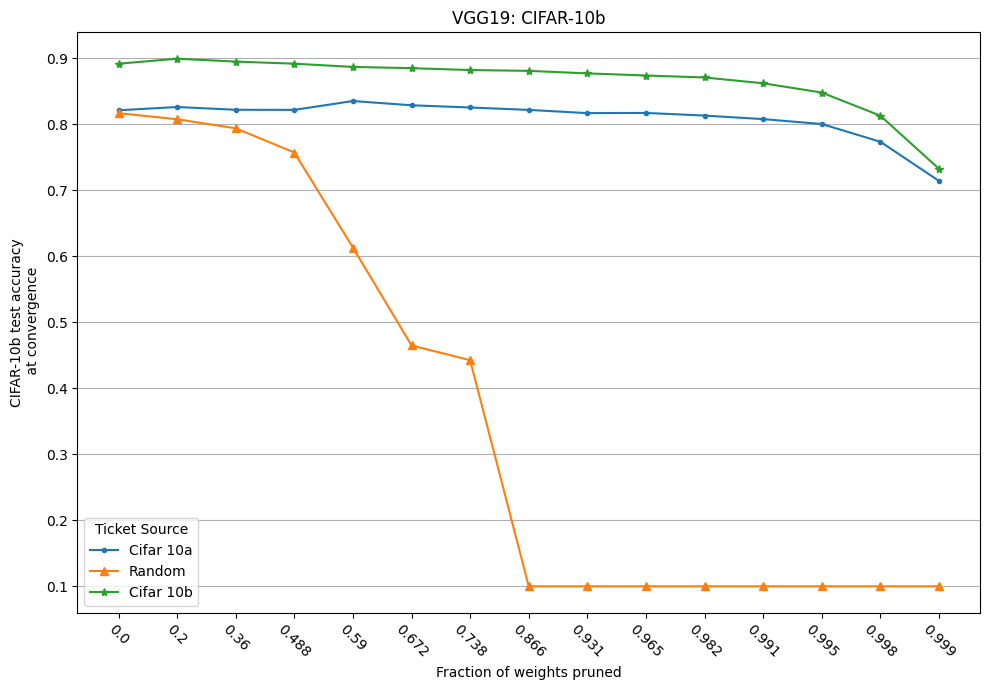

In [10]:
plt.figure(figsize=(10,7))
plt.plot([i for i in range(len(idx))], [cifar_a[i]/100 for i in idx], label='Cifar 10a', marker = '.')
plt.plot([i for i in range(len(idx))], [rd[i]/100 for i in idx], label="Random", marker='^')
plt.plot([i for i in range(len(idx))], [cifar_b[i]/100 for i in idx], label='Cifar 10b', marker='*')
plt.title("VGG19: CIFAR-10b")
plt.xlabel("Fraction of weights pruned")
plt.ylabel("CIFAR-10b test accuracy\n at convergence")
tick_lbls = [np.round(x[i]/100, 3) for i in idx]
plt.xticks(range(len(idx)), tick_lbls, rotation = -45)
plt.grid(axis='y')
plt.legend(loc="best",title="Ticket Source")
plt.tight_layout()
plt.savefig("Exp1_VGG_N.pdf")